# RITESH SINGH
# 1806092


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('heart_diagnosis.csv', sep= ',')
data

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,severity
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbp     303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null object
thal        303 non-null object
severity    303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB
None


In [ ]:
print('Shape of Dataset:',data.shape)
print('Number of rows:',data.shape[0])
print('Number of columns : ',data.shape[1])

Shape of Dataset: (303, 14)
Number of rows: 303
Number of columns :  14


In [ ]:
data.describe()

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,severity
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
# lets change the heart disease types 1to 4 to 1
# data.loc[data['target'] > 0 , 'target'] =1

# lets catergories the age into 
# 1: young age (29-40) , 
# 2: middle age (40-55) , and 
# 3: oldage(<50)
# data.loc[(data.age >= 29) & (data.age < 40), 'age'] = 1
# data.loc[(data.age >= 40) & (data.age < 55) , 'age'] = 2
# data.loc[(data.age >= 55) , 'age'] = 3

# convert to number
data.ca = pd.to_numeric(data.ca,errors='coerce').fillna(0)
data.thal = pd.to_numeric(data.thal,errors='coerce').fillna(0)


In [ ]:
data

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,severity
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


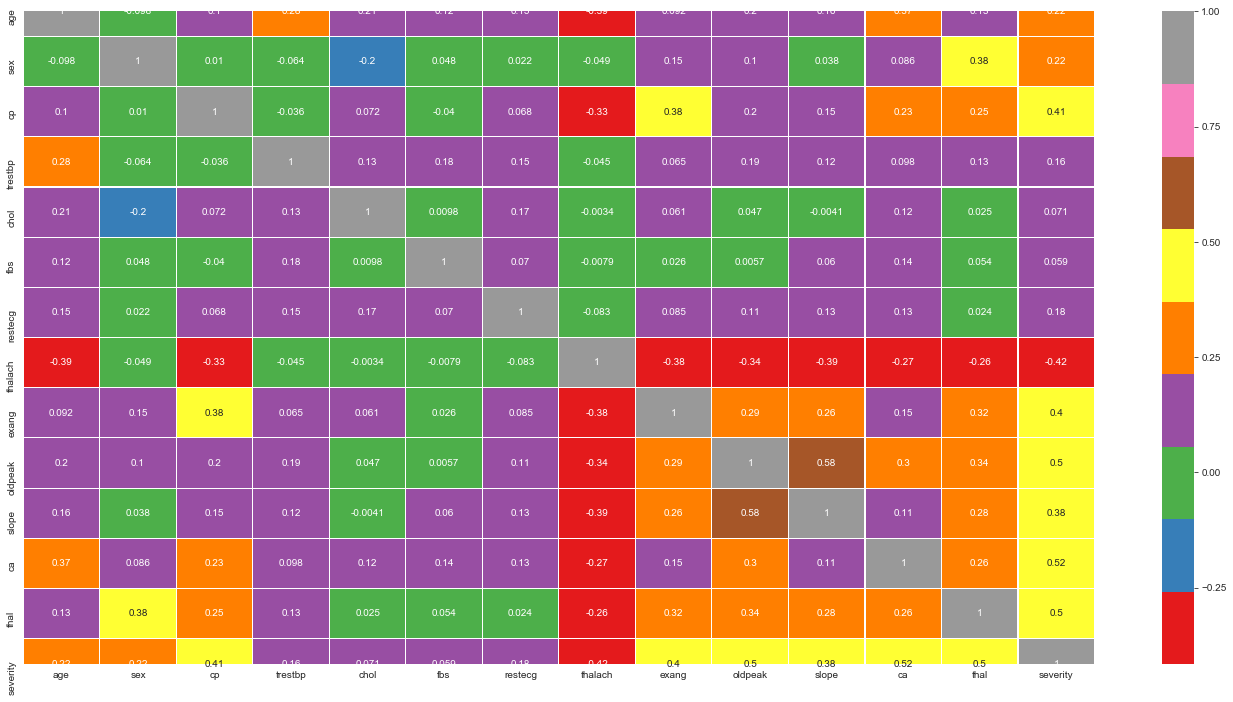

In [ ]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),cmap='Set1', annot = True, linewidths=.1)
plt.show()

In [ ]:
#data1 = data.drop(data.columns[[0,1,2,8,9,10,11,12]],axis=1)
data1 = data.drop(data.columns[[3,4,5,6,7]],axis=1)
data_X = data1.drop('severity',axis=1)
data_Y = data1['severity']
data_X



,age,sex,cp,exang,oldpeak,slope,ca,thal
0,63,1,1,0,2.3,3,0.0,6.0
1,67,1,4,1,1.5,2,3.0,3.0
2,67,1,4,1,2.6,2,2.0,7.0
3,37,1,3,0,3.5,3,0.0,3.0
4,41,0,2,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...
298,45,1,1,0,1.2,2,0.0,7.0
299,68,1,4,0,3.4,2,2.0,7.0
300,57,1,4,1,1.2,2,1.0,7.0
301,57,0,2,0,0.0,2,1.0,3.0


In [ ]:
data_Y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: severity, Length: 303, dtype: int64

In [ ]:
normal_data_X = (data_X - np.min(data_X)) / (np.max(data_X) - np.min(data_X))
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y =train_test_split(normal_data_X,data_Y,random_state=0,test_size=0.2)
print('test_X',test_X.shape)
print('test_Y',test_y.shape)
print('train_X',train_X.shape)
print('train_Y',train_y.shape)

test_X (61, 8)
test_Y (61,)
train_X (242, 8)
train_Y (242,)


In [ ]:
train_X

,age,sex,cp,exang,oldpeak,slope,ca,thal
74,0.312500,1.0,1.000000,0.0,0.000000,0.0,0.333333,0.428571
153,0.541667,1.0,1.000000,1.0,0.129032,0.5,0.333333,1.000000
64,0.520833,1.0,1.000000,0.0,0.225806,0.5,0.333333,1.000000
296,0.625000,1.0,1.000000,0.0,0.161290,0.5,0.666667,0.857143
287,0.604167,1.0,0.333333,0.0,0.064516,0.5,0.000000,1.000000
...,...,...,...,...,...,...,...,...
251,0.604167,1.0,1.000000,0.0,0.322581,0.5,0.333333,1.000000
192,0.291667,1.0,1.000000,1.0,0.016129,0.5,0.000000,1.000000
117,0.125000,0.0,1.000000,0.0,0.225806,0.0,0.000000,0.428571
47,0.437500,1.0,1.000000,0.0,0.419355,0.5,0.000000,1.000000


In [ ]:
test_X

,age,sex,cp,exang,oldpeak,slope,ca,thal
225,0.104167,0.0,0.333333,0.0,0.112903,0.0,0.000000,0.428571
152,0.791667,0.0,0.666667,0.0,0.258065,0.5,0.000000,1.000000
228,0.520833,1.0,1.000000,1.0,0.000000,0.5,0.333333,0.428571
201,0.729167,0.0,1.000000,1.0,0.000000,0.0,0.000000,0.428571
52,0.312500,1.0,1.000000,0.0,0.000000,0.0,0.333333,0.428571
...,...,...,...,...,...,...,...,...
146,0.583333,1.0,1.000000,0.0,0.161290,0.5,1.000000,1.000000
302,0.187500,1.0,0.666667,0.0,0.000000,0.0,0.000000,0.428571
26,0.604167,0.0,0.666667,0.0,0.000000,0.0,0.000000,0.428571
108,0.666667,1.0,1.000000,1.0,0.580645,0.5,0.333333,1.000000


In [ ]:
train_y

74     1
153    4
64     2
296    3
287    0
      ..
251    1
192    1
117    0
47     4
172    1
Name: severity, Length: 242, dtype: int64

In [ ]:
test_y

225    0
152    0
228    3
201    0
52     2
      ..
146    4
302    0
26     0
108    2
89     0
Name: severity, Length: 61, dtype: int64

In [ ]:
accuracies =  {} 
# Support Vector Classifier
from sklearn import svm
from sklearn.metrics import accuracy_score
svm_model = svm.SVC(gamma='auto')
svm_model.fit(train_X, train_y) 
svm_prediction = svm_model.predict(test_X)
svm_accuracy = accuracy_score(test_y,svm_prediction)
accuracies['SVC'] = svm_accuracy*100
print(" Accuracy of SVC Model : ",svm_accuracy)

 Accuracy of SVC Model :  0.6721311475409836


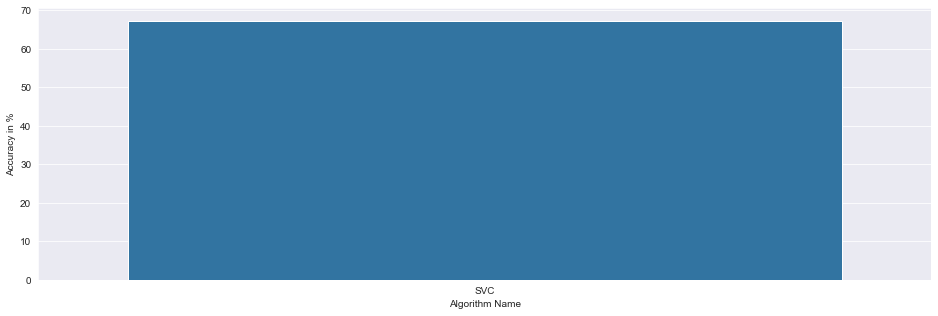

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy in %")
plt.xlabel("Algorithm Name")
sns.barplot(y=list(accuracies.values()),x=list(accuracies.keys()))
plt.show()